#### ¿Qué es una API y cómo puedes interactuar con ellas para obtener datos?
Una API (Application Programming Interface) es un conjunto de reglas y definiciones que permiten que diferentes sistemas o aplicaciones se comuniquen entre sí. En términos simples, una API actúa como un intermediario que facilita la interacción entre el usuario y un servicio.

#### ¿Cuál es la diferencia entre el web scraping y el uso de APIs?
Ambas técnicas permiten obtener datos de internet, pero se diferencian en la forma en que acceden y estructuran la información.
1. Web Scraping: 
    El web scraping consiste en extraer datos directamente de páginas web, analizando y procesando el HTML para obtener información específica.
2. Uso de APIs: 
    Una API proporciona un punto de acceso estructurado para obtener datos de un servicio de manera organizada y eficiente.

#### ¿Cómo puedes almacenar los datos adquiridos de una API o scraping en un archivo CSV?
 Una vez que extraes datos de una API o mediante web scraping, puedes almacenarlos en un archivo CSV para su análisis o procesamiento posterior. Para esto, usaremos la biblioteca csv de Python.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

api_key = '430e4019b114a409a4129dec965af078'
ciudad = "La Laguna"
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}'
response = requests.get(url)
data = response.json()

# Muestra los datos obtenidos
print(data)



{'coord': {'lon': -16.3201, 'lat': 28.4853}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 289.6, 'feels_like': 289.36, 'temp_min': 288.99, 'temp_max': 290.1, 'pressure': 1024, 'humidity': 79, 'sea_level': 1024, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 109, 'gust': 4.02}, 'clouds': {'all': 0}, 'dt': 1740244673, 'sys': {'type': 2, 'id': 2017385, 'country': 'ES', 'sunrise': 1740209837, 'sunset': 1740250834}, 'timezone': 0, 'id': 2511401, 'name': 'San Cristóbal de La Laguna', 'cod': 200}



📍 Ubicación: San Cristóbal de La Laguna, ES
🌍 Coordenadas: Latitud 28.4853, Longitud -16.3201
🌤 Clima: Clear (clear sky)
🌡 Temperatura: 289.6 K (≈ 16.45 °C)
🤔 Sensación térmica: 289.36 K (≈ 16.21 °C)
🔽 Mínima: 288.99 K (≈ 15.84 °C)
🔼 Máxima: 290.1 K (≈ 16.95 °C)
💨 Viento: 2.24 m/s, Dirección: 109°
💧 Humedad: 79%
📏 Presión: 1024 hPa
☁️ Nubosidad: 0%
👁 Visibilidad: 10000 m

✅ Datos guardados en clima_La Laguna.csv


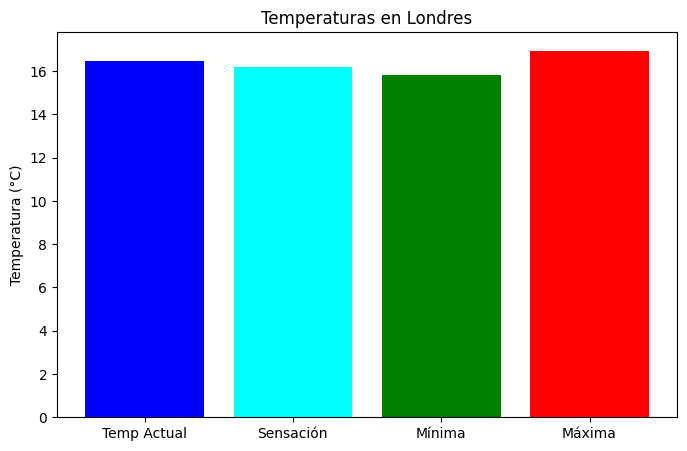

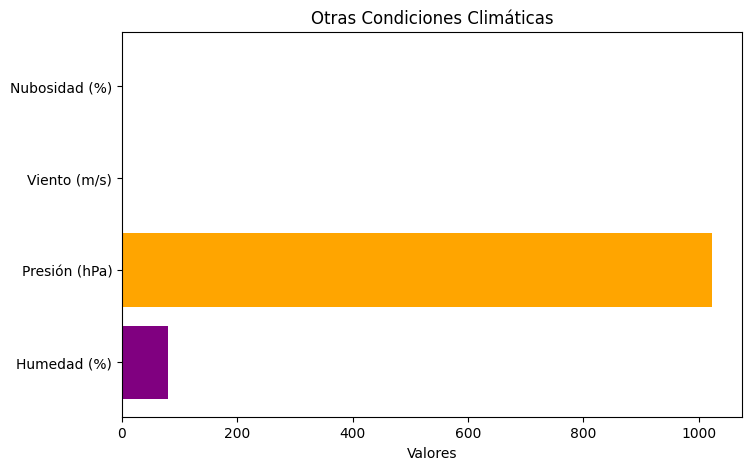

In [2]:

### 1️⃣ Formatear los datos y mostrarlos en consola
print(f"""
📍 Ubicación: {data['name']}, {data['sys']['country']}
🌍 Coordenadas: Latitud {data['coord']['lat']}, Longitud {data['coord']['lon']}
🌤 Clima: {data['weather'][0]['main']} ({data['weather'][0]['description']})
🌡 Temperatura: {data['main']['temp']} K (≈ {round(data['main']['temp'] - 273.15, 2)} °C)
🤔 Sensación térmica: {data['main']['feels_like']} K (≈ {round(data['main']['feels_like'] - 273.15, 2)} °C)
🔽 Mínima: {data['main']['temp_min']} K (≈ {round(data['main']['temp_min'] - 273.15, 2)} °C)
🔼 Máxima: {data['main']['temp_max']} K (≈ {round(data['main']['temp_max'] - 273.15, 2)} °C)
💨 Viento: {data['wind']['speed']} m/s, Dirección: {data['wind']['deg']}°
💧 Humedad: {data['main']['humidity']}%
📏 Presión: {data['main']['pressure']} hPa
☁️ Nubosidad: {data['clouds']['all']}%
👁 Visibilidad: {data['visibility']} m
""")

### 2️⃣ Guardar los datos en un archivo CSV con Pandas
df = pd.DataFrame([{
    "Ubicación": data["name"],
    "País": data["sys"]["country"],
    "Latitud": data["coord"]["lat"],
    "Longitud": data["coord"]["lon"],
    "Clima": data["weather"][0]["description"],
    "Temperatura (K)": data["main"]["temp"],
    "Temperatura (°C)": round(data["main"]["temp"] - 273.15, 2),
    "Sensación térmica (°C)": round(data["main"]["feels_like"] - 273.15, 2),
    "Temp Mín (°C)": round(data["main"]["temp_min"] - 273.15, 2),
    "Temp Máx (°C)": round(data["main"]["temp_max"] - 273.15, 2),
    "Humedad (%)": data["main"]["humidity"],
    "Presión (hPa)": data["main"]["pressure"],
    "Viento (m/s)": data["wind"]["speed"],
    "Dirección Viento (°)": data["wind"]["deg"],
    "Nubosidad (%)": data["clouds"]["all"],
    "Visibilidad (m)": data["visibility"]
}])

# Verificar si el archivo ya existe y eliminarlo
file_name = 'clima_{ciudad}.csv'
if os.path.exists(file_name):
    os.remove(file_name)  # Eliminar el archivo si existe

df.to_csv(f"clima_{ciudad}.csv", index=False)
print(f"✅ Datos guardados en clima_{ciudad}.csv")

### 3️⃣ Crear gráficos para visualizar los datos

# 📊 Gráfico de temperaturas
plt.figure(figsize=(8, 5))
temps = ["Temp Actual", "Sensación", "Mínima", "Máxima"]
values = [
    round(data["main"]["temp"] - 273.15, 2),
    round(data["main"]["feels_like"] - 273.15, 2),
    round(data["main"]["temp_min"] - 273.15, 2),
    round(data["main"]["temp_max"] - 273.15, 2),
]
plt.bar(temps, values, color=["blue", "cyan", "green", "red"])
plt.ylabel("Temperatura (°C)")
plt.title("Temperaturas en Londres")
plt.show()

# 📊 Gráfico de otras variables (Humedad, Presión, Viento)
plt.figure(figsize=(8, 5))
labels = ["Humedad (%)", "Presión (hPa)", "Viento (m/s)", "Nubosidad (%)"]
values = [data["main"]["humidity"], data["main"]["pressure"], data["wind"]["speed"], data["clouds"]["all"]]

plt.barh(labels, values, color=["purple", "orange", "blue", "gray"])
plt.xlabel("Valores")
plt.title("Otras Condiciones Climáticas")
plt.show()


#### Trabajo con Web Scraping (Ejemplo con BeautifulSoup)

In [3]:
from bs4 import BeautifulSoup  # Importamos BeautifulSoup para analizar el contenido HTML
import requests  # Importamos la librería requests para hacer peticiones HTTP

# Definimos la URL del sitio web que queremos scrape
url = 'https://www.bbc.com'

# Realizamos la solicitud HTTP al sitio web y obtenemos la respuesta
response = requests.get(url)

# Usamos BeautifulSoup para analizar el contenido de la respuesta en formato HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Buscamos todas las etiquetas <h2> en el contenido HTML, que deberían contener los titulares
headlines = soup.find_all('h2')

# Almacenamos los titulares en una lista
titles = []

# Recorremos cada uno de los elementos encontrados
for headline in headlines:
    text = headline.text.strip()
    if text:  # Solo añadimos si no está vacío
        titles.append(text)

# Imprimimos todos los titulares juntos, cada uno en una línea
# "\n" es el carácter de nueva línea en Python. Sirve para hacer un salto de línea.
# .join(titles) es un método de las cadenas en Python. Toma una lista de strings y los une en una sola cadena, 
# usando como separador la cadena desde la que se llama el método — en este caso, "\n".
print("\n".join(titles))

Watch: Six Israeli hostages released in Gaza
I'll back Ukraine in talks with Trump, Starmer says
Watch: Six Israeli hostages released in Gaza
I'll back Ukraine in talks with Trump, Starmer says
Freed hostages reunite with families, as release of Palestinian prisoners delayed
One dead after stabbing in France
Are planes crashing more often?
Fit for a pontiff: The Roman hospital caring for Pope Francis
Trans Euphoria star says new passport lists her as male
Weekend reads
The tiny Danish town transformed by Ozempic
The farmers protecting Nepal's snow leopards
Premier League
Premier League: Five games under way
Arts in Motion
Jia Zhang-Ke: Nothing brings more freedom than filmmaking
More news
India v Pakistan: Cricket's ultimate grudge match in the desert
Trump's '$21m for voter turnout' claim triggers political row in India
Who will be the next James Bond? Speculation mounts after Amazon buys 007
Trump fires top US general CQ Brown in shake-up at Pentagon
Berlin stabbing suspect planned t

In [4]:
# Verificar si el archivo ya existe y eliminarlo
file_name = 'bbc_headlines.csv'
if os.path.exists(file_name):
    os.remove(file_name)  # Eliminar el archivo si existe
    print('El archivo: bbc_headlines.csv, existe y lo borramos')
else:
    print('El archivo: bbc_headlines.csv, no existe')
    
headlines_text = [headline.text for headline in headlines]
df = pd.DataFrame(headlines_text, columns=['Headline'])
df.to_csv('bbc_headlines.csv', index=False)
print('El archivo: bbc_headlines.csv, guardado el nuevo archivo!')

El archivo: bbc_headlines.csv, existe y lo borramos
El archivo: bbc_headlines.csv, guardado
